# Tunning MultiClass Classifier Models - For CInc

## Importing Libraries

In [2]:
import pandas as pd
rs = 42
import numpy as np
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from scipy.stats import loguniform as sp_loguniform
from sklearn.model_selection import KFold,StratifiedKFold
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
rs = 42
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  accuracy_score,make_scorer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import mlxtend
#pip install scikit-plot
from sklearn.metrics import confusion_matrix
#import scikitplot as skplt

from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, cohen_kappa_score
from numpy import mean, std
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

# created functions
from evaluation import cross_validation_report,print_confusion_matrix,cross_validation_report_reg,nulls,boxplot_metrics, time_bar_chart,cv_report_4classes, test_validation_mult, multi_class_auc_plot

## Importing Data

In [3]:
# Check current working directory.
retval = os.getcwd()
print ("Current working directory %s" % retval)

Current working directory d:\Ramon\Thesis-Work-Server2\Thesis-Project


In [5]:
# importing dataset
dataset_l_tr = pd.read_csv('df4r_tr_l.csv')
dataset_l_ho = pd.read_csv('df4r_ho_l.csv')
dataset_l_tr.drop(['Donates','Volunteers'], axis = 1, inplace = True)
dataset_l_ho.drop(['Donates','Volunteers'], axis = 1, inplace = True)

In [6]:
# split the data into X and Y
y_ltr_c = dataset_l_tr['quant'].copy()
y_ltr_r = dataset_l_tr['CInc'].copy()
X_ltr = dataset_l_tr.drop(['CInc','quant'],axis=1).copy()

y_lho_c = dataset_l_ho['quant'].copy()
y_lho_r = dataset_l_ho['CInc'].copy()
X_lho = dataset_l_ho.drop(['CInc','quant'],axis=1).copy()

In [7]:
cv = StratifiedKFold(n_splits=10, random_state=rs, shuffle = True)

## Models

### LDA Tunning

### Random Forest Tunning

In [8]:
est = RandomForestClassifier(n_jobs = -1, random_state = rs)
rfe = RFE(est, n_features_to_select=  20)
rfe.fit(X_ltr, y_ltr_c)
selected_rf = []
for i in range(X_ltr.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (X_ltr.columns[i], rfe.support_[i], rfe.ranking_[i]))
    if rfe.support_[i] == True: 
        selected_rf.append(X_ltr.columns[i]) 

Column: Bachelor_GPA, Selected True, Rank: 1.000
Column: Bachelor_Honors, Selected False, Rank: 31.000
Column: Age, Selected True, Rank: 1.000
Column: Gender, Selected True, Rank: 1.000
Column: Scholarship_Percent, Selected True, Rank: 1.000
Column: First_Comp_Size, Selected True, Rank: 1.000
Column: Curr_Comp_Size, Selected True, Rank: 1.000
Column: Country_First_Job, Selected False, Rank: 30.000
Column: Years_Worked_Foreign, Selected True, Rank: 1.000
Column: Senior_Position, Selected False, Rank: 22.000
Column: People_in_Charge, Selected True, Rank: 1.000
Column: Negotiation_Imp, Selected True, Rank: 1.000
Column: TeamWork_Imp, Selected True, Rank: 1.000
Column: Innovation_Imp, Selected True, Rank: 1.000
Column: Communication_Imp, Selected True, Rank: 1.000
Column: Planning_Imp, Selected True, Rank: 1.000
Column: No_Created_Ventures, Selected True, Rank: 1.000
Column: Used_Incubator_program, Selected False, Rank: 52.000
Column: Board_Member, Selected False, Rank: 26.000
Column: NonP

In [9]:
selected_rf

['Bachelor_GPA',
 'Age',
 'Gender',
 'Scholarship_Percent',
 'First_Comp_Size',
 'Curr_Comp_Size',
 'Years_Worked_Foreign',
 'People_in_Charge',
 'Negotiation_Imp',
 'TeamWork_Imp',
 'Innovation_Imp',
 'Communication_Imp',
 'Planning_Imp',
 'No_Created_Ventures',
 'Love_relationships',
 'Help_Professional',
 'Curr_Loc_Foreign',
 'CurrE_Employee',
 'FInc',
 'work_hours_week']

In [11]:
selected_rf = ['Bachelor_GPA',
 'Age',
 'Gender',
 'Scholarship_Percent',
 'First_Comp_Size',
 'Curr_Comp_Size',
 'Years_Worked_Foreign',
 'People_in_Charge',
 'Negotiation_Imp',
 'TeamWork_Imp',
 'Innovation_Imp',
 'Communication_Imp',
 'Planning_Imp',
 'No_Created_Ventures',
 'Love_relationships',
 'Help_Professional',
 'Curr_Loc_Foreign',
 'CurrE_Employee',
 'FInc',
 'work_hours_week']

In [10]:
rf_grid_search= GridSearchCV(estimator = est, param_grid={ 'min_samples_split': [2,4,6,8], 'n_estimators': [10, 100, 500,1000], 'min_samples_leaf': [2,4,6,8],'criterion':['entropy','gini']}, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score=0, verbose = 2)
rf_grid_win = rf_grid_search.fit(X_ltr[selected_rf], y_ltr_c)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


In [12]:
# Get the estimator
best_clf_rf = rf_grid_win.best_estimator_
best_clf_rf
#results in data frame
rf_results = pd.DataFrame(rf_grid_win.cv_results_)
# show the first 5 rows
display(rf_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.355292,0.400722,0.038232,0.017095,entropy,2,2,10,"{'criterion': 'entropy', 'min_samples_leaf': 2...",0.479633,...,0.496945,0.506110,0.493890,0.505092,0.526477,0.505092,0.503055,0.501629,0.012008,128
1,1.748741,0.973554,0.621312,0.457563,entropy,2,2,100,"{'criterion': 'entropy', 'min_samples_leaf': 2...",0.535642,...,0.526477,0.541752,0.533605,0.556008,0.561100,0.537678,0.536660,0.542261,0.010196,73
2,7.408808,2.900184,5.805587,3.281696,entropy,2,2,500,"{'criterion': 'entropy', 'min_samples_leaf': 2...",0.539715,...,0.522403,0.550916,0.535642,0.557026,0.559063,0.537678,0.541752,0.543686,0.010289,64
3,17.383033,1.761433,3.599970,1.719229,entropy,2,2,1000,"{'criterion': 'entropy', 'min_samples_leaf': 2...",0.541752,...,0.526477,0.554990,0.527495,0.553971,0.556008,0.546843,0.545825,0.545010,0.010252,49
4,2.555708,2.252596,2.002351,2.159700,entropy,2,4,10,"{'criterion': 'entropy', 'min_samples_leaf': 2...",0.479633,...,0.496945,0.507128,0.493890,0.504073,0.527495,0.504073,0.503055,0.501731,0.011963,127


In [13]:
rf_scores = np.array(rf_results.mean_test_score)
print ("Best gridsearch parameters\n------")
print (rf_grid_win.best_params_)
print ("----------")
print ("Best score\n------")
print (rf_grid_win.best_score_)

Best gridsearch parameters
------
{'criterion': 'entropy', 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 500}
----------
Best score
------
0.5478615071283095


In [12]:
# Save the object in a python file
#import pickle
#with open('tuned_models/binary_rfc_model_win.data','wb') as data:
    #pickle.dump(rf_grid_win, data)
#with open('tuned_models/binary_rfc_model_grid.data','wb') as data:
    #pickle.dump(rf_grid_search, data)

In [16]:
rf_mult = RandomForestClassifier(random_state = rs, criterion = 'entropy', min_samples_split=2, min_samples_leaf = 6, n_estimators=500)

### Lasso Logistic Regression

In [25]:
# Create cross-validated logistic regression
c_values = np.linspace(0.001, 0.06, 100)
clf = LogisticRegressionCV(random_state=rs, penalty = 'l1', solver = 'liblinear',  verbose = 2, n_jobs=-1 , Cs=c_values, cv = cv, multi_class='ovr')
# Train model
clf_grid_win= clf.fit(X_ltr, y_ltr_c)
clf_grid_win.C_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done   8 out of  40 | elapsed:   34.8s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  29 out of  40 | elapsed:   48.4s remaining:   18.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.1min finished
[LibLinear][LibLinear][LibLinear][LibLinear]

array([0.04986869, 0.001     , 0.05106061, 0.03973737])

Text(0, 0.5, 'Mean CV-accuracy')

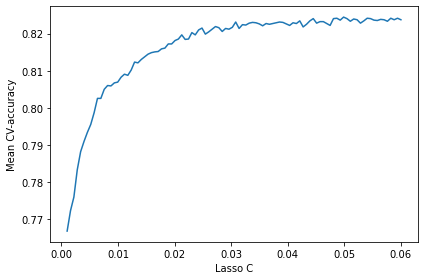

In [18]:
plt.plot(c_values, np.mean(clf_grid_win.scores_[0], axis=0))
plt.xlabel('Lasso C')
plt.ylabel('Mean CV-accuracy')

In [41]:
lr = LogisticRegression(random_state=rs, penalty = 'l1', verbose = 2, n_jobs = -1,multi_class='ovr', C =0.0511)

In [42]:
lr_grid_search= GridSearchCV(estimator = lr, param_grid={'solver' : ['liblinear', 'saga','newton-cg', 'lbfgs', 'sag']}, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score=0, verbose = 2)
lr_grid_win = lr_grid_search.fit(X_ltr, y_ltr_c)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[LibLinear]

In [43]:
# Get the estimator
best_clf_lr = lr_grid_win.best_estimator_
best_clf_lr
#results in data frame
lr_results = pd.DataFrame(lr_grid_win.cv_results_)
# show the first 5 rows
display(lr_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.858132,0.374825,0.006005,0.000775,liblinear,{'solver': 'liblinear'},0.549898,0.553971,0.541752,0.535642,0.540733,0.541752,0.556008,0.560081,0.544807,0.562118,0.548676,0.008590,1
1,3.815753,0.153288,0.005400,0.001020,saga,{'solver': 'saga'},0.294297,0.307536,0.296334,0.289206,0.287169,0.291242,0.294297,0.307536,0.289206,0.299389,0.295621,0.006892,2
2,0.016714,0.002371,0.000000,0.000000,newton-cg,{'solver': 'newton-cg'},0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
3,0.014912,0.000944,0.000000,0.000000,lbfgs,{'solver': 'lbfgs'},0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
4,0.015113,0.001301,0.000000,0.000000,sag,{'solver': 'sag'},0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3


In [44]:
lr_scores = np.array(lr_results.mean_test_score)
print ("Best gridsearch parameters\n------")
print (lr_grid_win.best_params_)
print ("----------")
print ("Best score\n------")
print (lr_grid_win.best_score_)

Best gridsearch parameters
------
{'solver': 'liblinear'}
----------
Best score
------
0.5486761710794298


In [45]:
means = lr_grid_win.cv_results_['mean_test_score']
stds = lr_grid_win.cv_results_['std_test_score']
params = lr_grid_win.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.548676 (0.008590) with: {'solver': 'liblinear'}
0.295621 (0.006892) with: {'solver': 'saga'}
0.000000 (0.000000) with: {'solver': 'newton-cg'}
0.000000 (0.000000) with: {'solver': 'lbfgs'}
0.000000 (0.000000) with: {'solver': 'sag'}


In [54]:
lr  = LogisticRegression(random_state=rs, penalty = 'l1', verbose = 2, n_jobs = -1,multi_class='ovr', C = 0.0511, solver = 'liblinear')

In [10]:
#sel_ = SelectFromModel(lr, max_features = 20)
#sel_= RFE(lr, n_features_to_select=  20)
#sel_.fit(X_ltr, y_ltr_c)
#selected_feat_lr = X_ltr.columns[(sel_.get_support())]
#selected_feat_lr

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

RFE(estimator=LogisticRegression(C=0.06, multi_class='ovr', n_jobs=-1,
                                 penalty='l1', random_state=42,
                                 solver='liblinear', verbose=2),
    n_features_to_select=20)

In [55]:
sbs = SFS(lr, 
          k_features=20, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=5,
          n_jobs=-1)

In [56]:
sbs = sbs.fit(X_ltr, y_ltr_c)
print('\nSequential Backward Selection (k=20):')
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)


Sequential Backward Selection (k=20):
(2, 3, 5, 6, 8, 10, 22, 28, 29, 30, 31, 38, 48, 59, 61, 62, 63, 64, 68, 69)
CV Score:
0.545010183299389


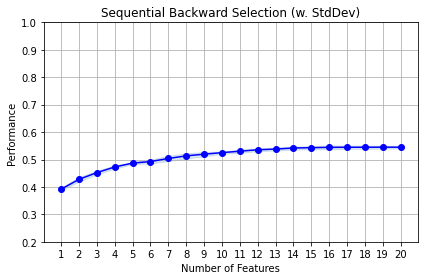

In [57]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.ylim([0.2, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

In [58]:
selected_feat_lr = X_ltr.columns[[sbs.k_feature_idx_]]
selected_feat_lr

Index(['Age', 'Gender', 'First_Comp_Size', 'Curr_Comp_Size',
       'Years_Worked_Foreign', 'People_in_Charge', 'Love_relationships',
       'Nationality_For', 'School_Engineering', 'School_Other', 'Campus_CDMX',
       'Curr_Loc_Foreign', 'MO_Employee', 'FInd_Secondary', 'CurrE_Employee',
       'CurrE_Manager', 'CurrE_Owner_Freelancer', 'CurrE_Senior Manager',
       'CInd_Tertiary', 'FInc'],
      dtype='object')

In [59]:
selected_feat_lr = ['Age', 'Gender', 'First_Comp_Size', 'Curr_Comp_Size',
       'Years_Worked_Foreign', 'People_in_Charge', 'Love_relationships',
       'Nationality_For', 'School_Engineering', 'School_Other', 'Campus_CDMX',
       'Curr_Loc_Foreign', 'MO_Employee', 'FInd_Secondary', 'CurrE_Employee',
       'CurrE_Manager', 'CurrE_Owner_Freelancer', 'CurrE_Senior Manager',
       'CInd_Tertiary', 'FInc']

In [60]:
lr.fit(X_ltr[selected_feat_lr],y_ltr_c)
lr.score(X_ltr[selected_feat_lr], y_ltr_c)

[LibLinear]

0.5475560081466395

In [61]:
lr_mult =LogisticRegression(random_state=rs, penalty = 'l1', verbose = 2, n_jobs = -1,multi_class='ovr', C = 0.0511, solver = 'liblinear')

In [62]:
# Create cross-validated logistic regression
clf_rd = LogisticRegressionCV(random_state=rs, penalty = 'l2',  verbose = 2, n_jobs=-1 , Cs=np.linspace(0.001, 0.06, 100), cv = cv)
# Train model
clf_rd_grid_win= clf_rd.fit(X_ltr[selected_feat_lr], y_ltr_c)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   19.5s remaining:   19.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   21.0s finished


In [63]:
np.max(clf_rd_grid_win.C_)

0.05702020202020203

Text(0, 0.5, 'Mean CV-accuracy')

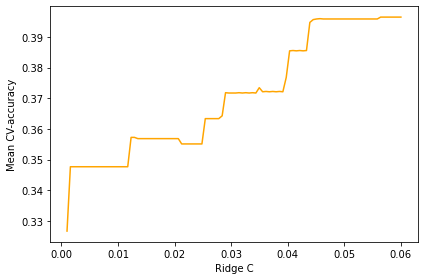

In [64]:
c_values = np.linspace(0.001, 0.06, 100)
plt.plot(c_values, np.mean(clf_rd_grid_win.scores_[1], axis=0) , color = 'orange')
plt.xlabel('Ridge C')
plt.ylabel('Mean CV-accuracy')

In [65]:
lr_rd_grid_search= GridSearchCV(estimator = lr_mult , param_grid={'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score=0, verbose = 2)
lr_rd_grid_win = lr_rd_grid_search.fit(X_ltr[selected_feat_lr], y_ltr_c)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[LibLinear]

In [66]:
# Get the estimator
best_clf_lr_rd = lr_rd_grid_win.best_estimator_
best_clf_lr_rd
#results in data frame
lr_rd_results = pd.DataFrame(lr_rd_grid_win.cv_results_)
# show the first 5 rows
display(lr_rd_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.381614,0.054269,0.005304,0.000901,liblinear,{'solver': 'liblinear'},0.542770,0.561100,0.527495,0.539715,0.550916,0.552953,0.551935,0.551935,0.522403,0.551935,0.545316,0.011622,1
1,0.006808,0.001166,0.000000,0.000000,newton-cg,{'solver': 'newton-cg'},0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
2,0.006101,0.001225,0.000000,0.000000,lbfgs,{'solver': 'lbfgs'},0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
3,0.005805,0.000749,0.000000,0.000000,sag,{'solver': 'sag'},0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
4,1.592914,0.212119,0.005805,0.001167,saga,{'solver': 'saga'},0.248473,0.248473,0.248473,0.249491,0.249491,0.249491,0.249491,0.249491,0.249491,0.249491,0.249185,0.000467,2


In [67]:
lr_rd_scores = np.array(lr_rd_results.mean_test_score)
print ("Best gridsearch parameters\n------")
print (lr_rd_grid_win.best_params_)
print ("----------")
print ("Best score\n------")
print (lr_rd_grid_win.best_score_)

Best gridsearch parameters
------
{'solver': 'liblinear'}
----------
Best score
------
0.5453156822810591


In [68]:
lr_rd.fit(X_ltr[selected_feat_lr],y_ltr_c)
lr_rd.score(X_ltr[selected_feat_lr], y_ltr_c)

NameError: name 'lr_rd' is not defined

In [69]:
means = lr_rd_grid_win.cv_results_['mean_test_score']
stds = lr_rd_grid_win.cv_results_['std_test_score']
params = lr_rd_grid_win.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.545316 (0.011622) with: {'solver': 'liblinear'}
0.000000 (0.000000) with: {'solver': 'newton-cg'}
0.000000 (0.000000) with: {'solver': 'lbfgs'}
0.000000 (0.000000) with: {'solver': 'sag'}
0.249185 (0.000467) with: {'solver': 'saga'}


### Light Gradient Boosting Tunning

In [22]:
# Load the object
#import pickle
#with open('tuned_models/binary_lgb_model_win.data','rb') as data:
    #lgb_grid_win= pickle.load(data)
#with open('tuned_models/binary_lgb_model_grid.data','rb') as data:
    #lgb_grid_search= pickle.load(data)

In [70]:
est = LGBMClassifier(random_state = rs, objective = 'multiclass')
rfe = RFE(est, n_features_to_select=  20)
rfe.fit(X_ltr, y_ltr_c)
selected_lgb = []
for i in range(X_ltr.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (X_ltr.columns[i], rfe.support_[i], rfe.ranking_[i]))
    if rfe.support_[i] == True: 
        selected_lgb.append(X_ltr.columns[i])   

Column: Bachelor_GPA, Selected True, Rank: 1.000
Column: Bachelor_Honors, Selected False, Rank: 22.000
Column: Age, Selected True, Rank: 1.000
Column: Gender, Selected True, Rank: 1.000
Column: Scholarship_Percent, Selected True, Rank: 1.000
Column: First_Comp_Size, Selected True, Rank: 1.000
Column: Curr_Comp_Size, Selected True, Rank: 1.000
Column: Country_First_Job, Selected False, Rank: 24.000
Column: Years_Worked_Foreign, Selected True, Rank: 1.000
Column: Senior_Position, Selected False, Rank: 17.000
Column: People_in_Charge, Selected True, Rank: 1.000
Column: Negotiation_Imp, Selected False, Rank: 2.000
Column: TeamWork_Imp, Selected False, Rank: 3.000
Column: Innovation_Imp, Selected True, Rank: 1.000
Column: Communication_Imp, Selected False, Rank: 14.000
Column: Planning_Imp, Selected True, Rank: 1.000
Column: No_Created_Ventures, Selected True, Rank: 1.000
Column: Used_Incubator_program, Selected False, Rank: 51.000
Column: Board_Member, Selected False, Rank: 34.000
Column: 

In [71]:
selected_lgb

['Bachelor_GPA',
 'Age',
 'Gender',
 'Scholarship_Percent',
 'First_Comp_Size',
 'Curr_Comp_Size',
 'Years_Worked_Foreign',
 'People_in_Charge',
 'Innovation_Imp',
 'Planning_Imp',
 'No_Created_Ventures',
 'School_Engineering',
 'Campus_MTY',
 'Curr_Loc_Foreign',
 'FInd_Quaternary',
 'CurrE_Manager',
 'CurrE_Senior Manager',
 'CInd_Tertiary',
 'FInc',
 'work_hours_week']

In [72]:
selected_lgb = ['Bachelor_GPA',
 'Age',
 'Gender',
 'Scholarship_Percent',
 'First_Comp_Size',
 'Curr_Comp_Size',
 'Years_Worked_Foreign',
 'People_in_Charge',
 'Innovation_Imp',
 'Planning_Imp',
 'No_Created_Ventures',
 'School_Engineering',
 'Campus_MTY',
 'Curr_Loc_Foreign',
 'FInd_Quaternary',
 'CurrE_Manager',
 'CurrE_Senior Manager',
 'CInd_Tertiary',
 'FInc',
 'work_hours_week']

In [73]:
lgb_grid_search= GridSearchCV(estimator = est, param_grid={'max_depth': [2,4,6,8], 'n_estimators': [10, 100, 500], 'num_leaves': [4,16,32,64] , 'learning_rate':list(np.logspace(np.log(0.005), np.log(0.2),base = np.exp(1), num= 10)) }, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score=0, verbose = 2)
lgb_grid_win = lgb_grid_search.fit(X_ltr[selected_lgb], y_ltr_c)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits


In [74]:
# Get the estimator
best_clf_lgb = lgb_grid_win.best_estimator_
best_clf_lgb
#results in data frame
lgb_results = pd.DataFrame(lgb_grid_win.cv_results_)
# show the first 5 rows
display(lgb_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_num_leaves,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.149425,0.019514,0.009406,0.001745,0.005,2,10,4,"{'learning_rate': 0.005000000000000004, 'max_d...",0.330957,...,0.325866,0.341141,0.324847,0.325866,0.327902,0.338086,0.323829,0.329633,0.005725,474
1,0.135011,0.022563,0.009208,0.001328,0.005,2,10,16,"{'learning_rate': 0.005000000000000004, 'max_d...",0.330957,...,0.325866,0.341141,0.324847,0.325866,0.327902,0.338086,0.323829,0.329633,0.005725,474
2,0.120499,0.013738,0.008807,0.001167,0.005,2,10,32,"{'learning_rate': 0.005000000000000004, 'max_d...",0.330957,...,0.325866,0.341141,0.324847,0.325866,0.327902,0.338086,0.323829,0.329633,0.005725,474
3,0.117597,0.011742,0.008207,0.001401,0.005,2,10,64,"{'learning_rate': 0.005000000000000004, 'max_d...",0.330957,...,0.325866,0.341141,0.324847,0.325866,0.327902,0.338086,0.323829,0.329633,0.005725,474
4,0.610903,0.103685,0.029224,0.005763,0.005,2,100,4,"{'learning_rate': 0.005000000000000004, 'max_d...",0.467413,...,0.435845,0.474542,0.436864,0.481670,0.464358,0.466395,0.470468,0.463442,0.014318,420


In [75]:
lgb_scores = np.array(lgb_results.mean_test_score)
print ("Best gridsearch parameters\n------")
print (lgb_grid_win.best_params_)
print ("----------")
print ("Best score\n------")
print (lgb_grid_win.best_score_)

Best gridsearch parameters
------
{'learning_rate': 0.03881533447356429, 'max_depth': 8, 'n_estimators': 100, 'num_leaves': 32}
----------
Best score
------
0.5774949083503056


In [76]:
lgbm_mult = LGBMClassifier(random_state = rs,  max_depth = 8, n_estimators =  100, num_leaves = 32, learning_rate = 0.03881533447356429)

In [78]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_ltr, y_ltr_c)
params = { 
    'objective': 'multiclass', 
    'num_class':4, 
    'metric': 'multi_logloss' ,
    'objective' : 'multiclass', 
    'metric' : 'multi_logloss',
    'n_estimators' : 100, 
    'num_leaves' :32, 
    'learning_rates'  : 0.03881533447356429, 
    'max_depth' :8
} 
clf= lgb.train(params,lgb_train)
y_pred_1=clf.predict(X_lho)
y_pred_1 = [np.argmax(line) for line in y_pred_1]
accuracy_score(y_pred_1,y_lho_c).mean()

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.243742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 608
[LightGBM] [Info] Number of data points in the train set: 9820, number of used features: 71
[LightGBM] [Info] Start training from score -1.368530
[LightGBM] [Info] Start training from score -1.257663
[LightGBM] [Info] Start training from score -1.551092
[LightGBM] [Info] Start training from score -1.389558
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


0.5979633401221995

## Evaluation

In [79]:
classifiers = {}
auc_results = {}
f1_results = {}
acc_results = {}
kappa_results = {}
clf_time = {}
classifiers['acc'] = acc_results
classifiers['f1'] = f1_results
classifiers['auc'] = auc_results
classifiers['kappa'] = kappa_results
classifiers['time'] = clf_time

In [90]:
from sklearn import metrics, utils
import time
#Multiclass
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
def cv_report_4classes(X,y, classifier, cnames, model_name, scale = False):
    kf =KFold(n_splits=10, random_state=rs, shuffle = True)
    # define X and y
    y = y.values
    X = X.values
    X, y = utils.shuffle(X, y, random_state=rs)
    auc_scores = []
    acc_scores = []
    f1_scores = []
    kappa_scores = []
    fir = []
    sec = []
    thi = []
    fou = []
    fiv = []
    six = []
    sev = []
    eig = []
    nin = []
    ten = []
    ele = []
    twe = []
    tht = []
    fot = []
    fit = []
    sit = []
    # Binarize the output with 4 classes
    st = time.time()
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        if scale == True:
            scaler = StandardScaler()
            scaler.fit(X_train)
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)
        model_ovr = OneVsRestClassifier(classifier)
        model = classifier.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_proba, multi_class = 'ovr')
        f1 = metrics.f1_score(y_test, y_pred, average = 'weighted')
        kappa = metrics.cohen_kappa_score(y_test,y_pred)
        acc = metrics.accuracy_score(y_test,y_pred)
        # Append the scores to the list
        auc_scores.append(auc)
        f1_scores.append(f1)
        kappa_scores.append(kappa)
        acc_scores.append(acc)
        cm = metrics.confusion_matrix(y_test, y_pred)
        fir.append(cm[0][0])
        sec.append(cm[1][0])
        thi.append(cm[2][0])
        fou.append(cm[3][0])
        fiv.append(cm[0][1])
        six.append(cm[1][1])
        sev.append(cm[2][1])
        eig.append(cm[3][1])
        nin.append(cm[0][2])
        ten.append(cm[1][2])
        ele.append(cm[2][2])
        twe.append(cm[3][2])
        tht.append(cm[0][3])
        fot.append(cm[1][3])
        fit.append(cm[2][3])
        sit.append(cm[3][3])
    end = time.time()
    fir = int(np.sum(fir))
    sec = int(np.sum(sec))
    thi = int(np.sum(thi))
    fou = int(np.sum(fou))
    fiv = int(np.sum(fiv))
    six = int(np.sum(six))
    sev = int(np.sum(sev))
    eig = int(np.sum(eig))
    nin = int(np.sum(nin))
    ten = int(np.sum(ten))
    ele = int(np.sum(ele))
    twe = int(np.sum(twe))
    tht = int(np.sum(tht))
    fot = int(np.sum(fot))
    fit = int(np.sum(fit))
    sit = int(np.sum(sit))
    matrix = np.array([[fir, fiv, nin, tht] , [sec, six, ten, fot], [thi, sev, ele, fit], [fou, eig, twe, sit]])
    measured_time = end-st
    print(f'Model: {model_name}')
    print(f' AUC : {np.average(auc_scores)}')
    print(f' F1 weighted : {np.average(f1_scores)}')
    print(f' Accuracy : {np.average(acc_scores)}')
    print(f' Kappa Statitic : {np.average(kappa_scores)}')
    print('Process Complete in : '+str(measured_time)+' sec.')
    #matrix_norm = np.array([[round(TN/sum_up,3), round(FP/sum_up,3)] , [round(FN/sum_down,3), round(TP/sum_down,3)]])
    return (matrix,cnames), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time  

In [91]:
dummy = DummyClassifier(random_state= rs, strategy = 'uniform') # generates prediction uniformly at random

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Model: LogReg w/Selected Features
 AUC : 0.7883590900636068
 F1 weighted : 0.517989481997141
 Accuracy : 0.5427698574338085
 Kappa Statitic : 0.3862464798527353
Process Complete in : 3.0875208377838135 sec.


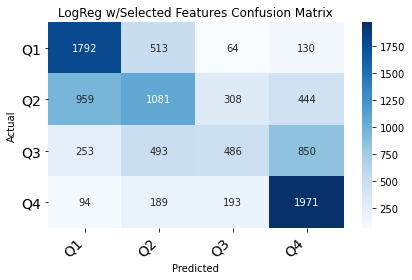

In [92]:
name = 'LogReg w/Selected Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cv_report_4classes(X_ltr[selected_feat_lr ],y_ltr_c,lr_mult,cnames = ['Q1','Q2','Q3','Q4'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Model: LogReg w/All Features
 AUC : 0.7953789501157218
 F1 weighted : 0.5221372047698981
 Accuracy : 0.5456211812627292
 Kappa Statitic : 0.3897545877710477
Process Complete in : 15.0433988571167 sec.


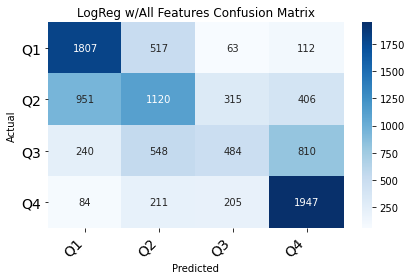

In [93]:
name = 'LogReg w/All Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cv_report_4classes(X_ltr,y_ltr_c,lr_mult,cnames =['Q1','Q2','Q3','Q4'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: RF w/Selected Features
 AUC : 0.8049885874004534
 F1 weighted : 0.5304766666076345
 Accuracy : 0.5477596741344195
 Kappa Statitic : 0.391130263732915
Process Complete in : 113.9519579410553 sec.


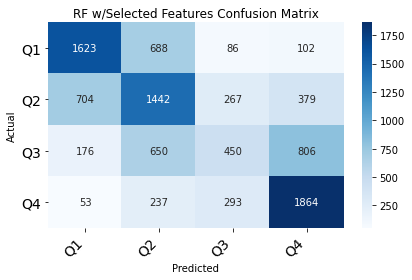

In [94]:
name = 'RF w/Selected Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cv_report_4classes(X_ltr[selected_rf],y_ltr_c,rf_mult,cnames = ['Q1','Q2','Q3','Q4'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: RF w/All Features
 AUC : 0.8271115866825332
 F1 weighted : 0.5591606223658288
 Accuracy : 0.5780040733197556
 Kappa Statitic : 0.43172244097156265
Process Complete in : 123.01743817329407 sec.


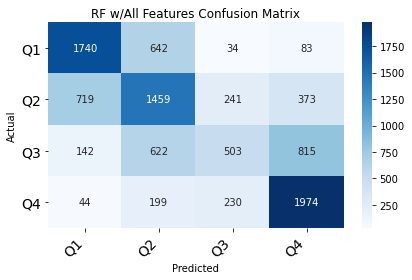

In [101]:
name = 'RF w/All Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cv_report_4classes(X_ltr,y_ltr_c,rf_mult,cnames = ['Q1','Q2','Q3','Q4'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: LGBM w/Selected Features
 AUC : 0.823066133061489
 F1 weighted : 0.5676034568227543
 Accuracy : 0.5763747454175153
 Kappa Statitic : 0.4310192015314655
Process Complete in : 151.9052538871765 sec.


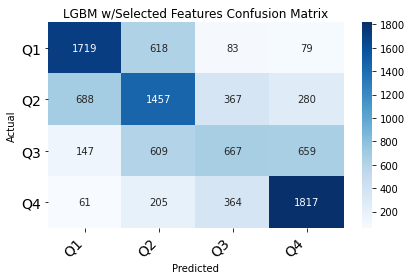

In [102]:
name = 'LGBM w/Selected Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cv_report_4classes(X_ltr[selected_lgb],y_ltr_c,lgbm_mult,cnames = ['Q1','Q2','Q3','Q4'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: LGBM w/All Features
 AUC : 0.8324436577759435
 F1 weighted : 0.5802228467390954
 Accuracy : 0.5887983706720977
 Kappa Statitic : 0.44776222770585805
Process Complete in : 334.90413188934326 sec.


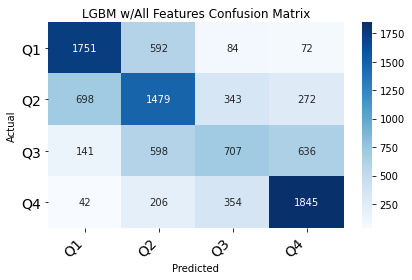

In [103]:
name = 'LGBM w/All Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cv_report_4classes(X_ltr,y_ltr_c,lgbm_mult,cnames = ['Q1','Q2','Q3','Q4'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: Dummy Classifier
 AUC : 0.5
 F1 weighted : 0.2519600938811589
 Accuracy : 0.2515274949083503
 Kappa Statitic : 0.0021718985899417897
Process Complete in : 0.2712228298187256 sec.


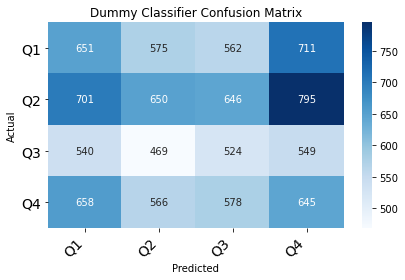

In [104]:
name = 'Dummy Classifier'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cv_report_4classes(X_ltr,y_ltr_c,dummy,cnames = ['Q1','Q2','Q3','Q4'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

## Hold Out Validation

In [105]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

[LibLinear][LibLinear][LibLinear][LibLinear]Accuracy score : 0.5331975560081467
AUC score: 0.7878918821132964
F1 score: 0.5070224880021436
Kappa score: 0.37449795736875746


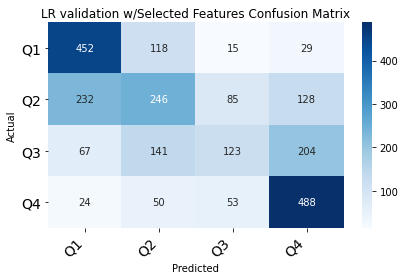

In [107]:
predictions,proba = test_validation_mult(lr_mult,  X_ltr, y_ltr_c, X_lho, selected_feat_lr,True)
model_name = 'LR validation w/Selected Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba, multi_class = 'ovr')
f1_results[model_name] = f1_score(y_lho_c, predictions, average = 'weighted')
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {acc_results[model_name]}')
print(f'AUC score: {auc_results[model_name]}')
print(f'F1 score: {f1_results[model_name]}')
print(f'Kappa score: {kappa_results[model_name]}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['Q1','Q2','Q3','Q4']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()

[LibLinear][LibLinear][LibLinear][LibLinear]

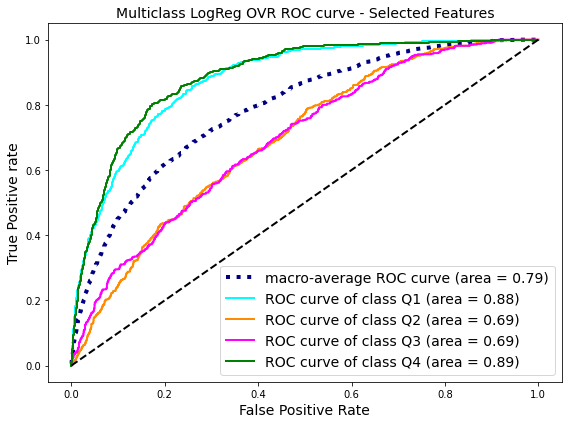

In [108]:
multi_class_auc_plot(lr_mult,X_ltr[selected_feat_lr], y_ltr_c, X_lho[selected_feat_lr], y_lho_c, title = 'Multiclass LogReg OVR ROC curve - Selected Features')

[LibLinear][LibLinear][LibLinear][LibLinear]Accuracy score : 0.5486761710794298
AUC score: 0.7954677245403659
F1 score: 0.5265306342243318
Kappa score: 0.39530057127816653


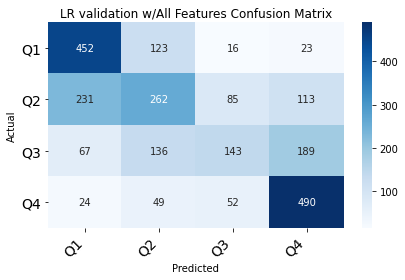

In [110]:
predictions,proba = test_validation_mult(lr_mult,  X_ltr, y_ltr_c, X_lho, False,True)
model_name = 'LR validation w/All Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba, multi_class = 'ovr')
f1_results[model_name] = f1_score(y_lho_c, predictions, average = 'weighted')
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {acc_results[model_name]}')
print(f'AUC score: {auc_results[model_name]}')
print(f'F1 score: {f1_results[model_name]}')
print(f'Kappa score: {kappa_results[model_name]}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['Q1','Q2','Q3','Q4']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()

[LibLinear][LibLinear][LibLinear][LibLinear]

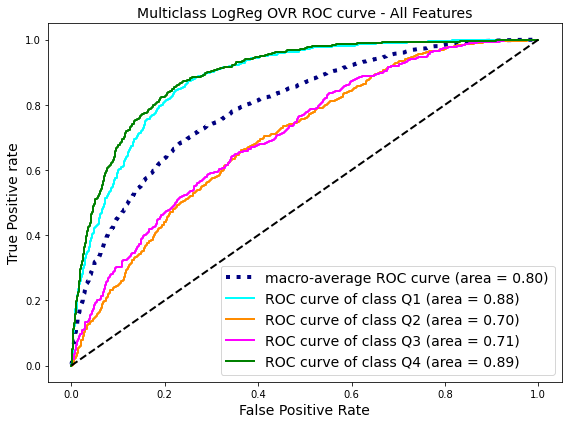

In [111]:
multi_class_auc_plot(lr_mult,X_ltr, y_ltr_c, X_lho, y_lho_c, title = 'Multiclass LogReg OVR ROC curve - All Features')

Accuracy score : 0.5486761710794298
AUC score: 0.8087147029622044
F1 score: 0.5290082906459452
Kappa score: 0.393525234071604


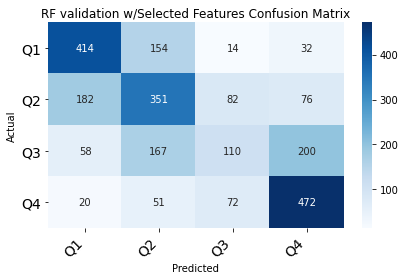

In [129]:
predictions,proba = test_validation_mult(rf_mult, X_ltr, y_ltr_c, X_lho,selected_rf,True)
model_name = 'RF validation w/Selected Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba, multi_class = 'ovr')
f1_results[model_name] = f1_score(y_lho_c, predictions, average = 'weighted')
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {acc_results[model_name]}')
print(f'AUC score: {auc_results[model_name]}')
print(f'F1 score: {f1_results[model_name]}')
print(f'Kappa score: {kappa_results[model_name]}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['Q1','Q2','Q3','Q4']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()

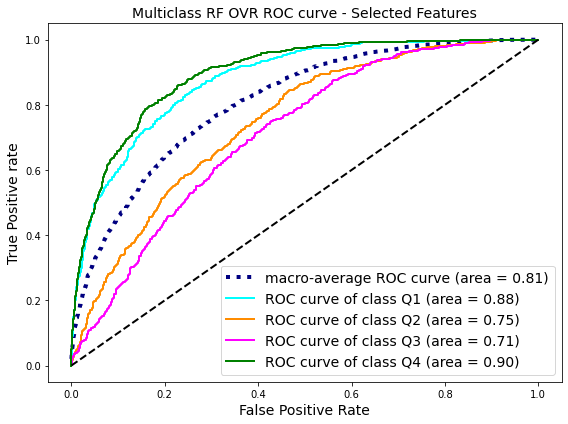

In [130]:
multi_class_auc_plot(rf_mult,X_ltr[selected_rf], y_ltr_c, X_lho[selected_rf], y_lho_c, title = 'Multiclass RF OVR ROC curve - Selected Features')

Accuracy score : 0.5885947046843177
AUC score: 0.8309191657118921
F1 score: 0.5676031445960262
Kappa score: 0.44697588109607866


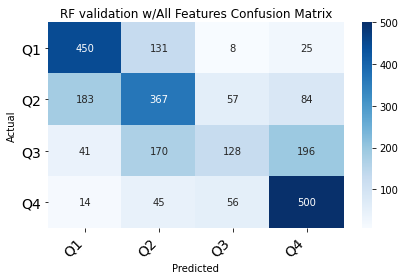

In [131]:
predictions,proba = test_validation_mult(rf_mult, X_ltr, y_ltr_c, X_lho,False,True)
model_name = 'RF validation w/All Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba, multi_class = 'ovr')
f1_results[model_name] = f1_score(y_lho_c, predictions, average = 'weighted')
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {acc_results[model_name]}')
print(f'AUC score: {auc_results[model_name]}')
print(f'F1 score: {f1_results[model_name]}')
print(f'Kappa score: {kappa_results[model_name]}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['Q1','Q2','Q3','Q4']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()

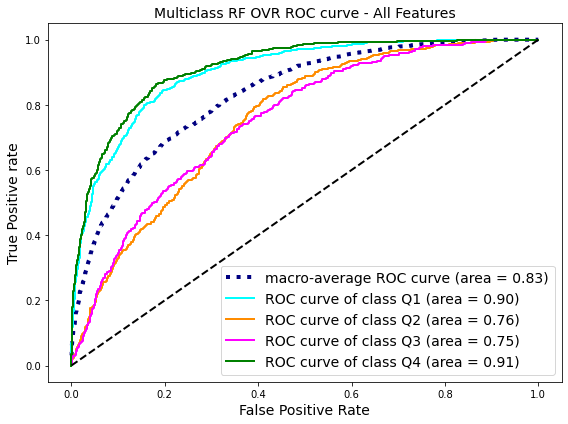

In [132]:
multi_class_auc_plot(rf_mult,X_ltr, y_ltr_c, X_lho, y_lho_c, title = 'Multiclass RF OVR ROC curve - All Features')

Accuracy score : 0.5837067209775968
AUC score: 0.8276364395010682
F1 score: 0.5736010520525555
Kappa score: 0.4409238957622468


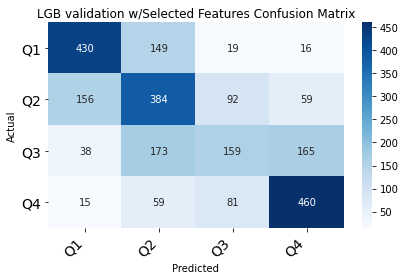

In [135]:
predictions,proba = test_validation_mult(lgbm_mult, X_ltr, y_ltr_c, X_lho,selected_lgb, True)
model_name = 'LGB validation w/Selected Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba, multi_class = 'ovr')
f1_results[model_name] = f1_score(y_lho_c, predictions, average = 'weighted')
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {acc_results[model_name]}')
print(f'AUC score: {auc_results[model_name]}')
print(f'F1 score: {f1_results[model_name]}')
print(f'Kappa score: {kappa_results[model_name]}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['Q1','Q2','Q3','Q4']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()

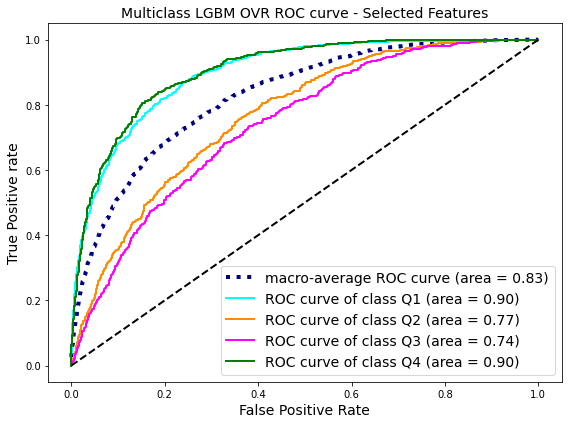

In [136]:
multi_class_auc_plot(lgbm_mult,X_ltr[selected_lgb], y_ltr_c, X_lho[selected_lgb], y_lho_c, title = 'Multiclass LGBM OVR ROC curve - Selected Features')

Accuracy score : 0.6065173116089613
AUC score: 0.8363350487998494
F1 score: 0.5954874800226335
Kappa score: 0.4717364181843332


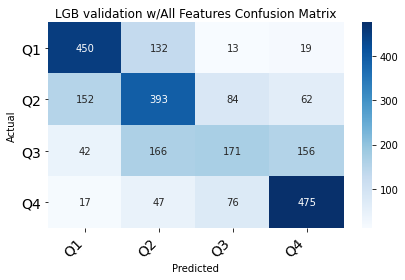

In [137]:
predictions,proba = test_validation_mult(lgbm_mult, X_ltr, y_ltr_c, X_lho,False, True)
model_name = 'LGB validation w/All Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba, multi_class = 'ovr')
f1_results[model_name] = f1_score(y_lho_c, predictions, average = 'weighted')
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {acc_results[model_name]}')
print(f'AUC score: {auc_results[model_name]}')
print(f'F1 score: {f1_results[model_name]}')
print(f'Kappa score: {kappa_results[model_name]}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['Q1','Q2','Q3','Q4']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()

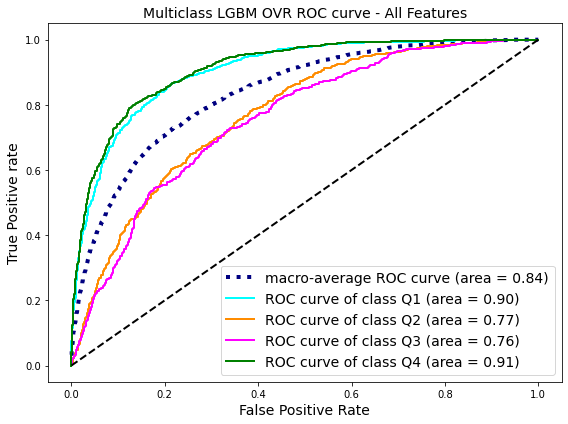

In [138]:
multi_class_auc_plot(lgbm_mult,X_ltr, y_ltr_c, X_lho, y_lho_c, title = 'Multiclass LGBM OVR ROC curve - All Features')

Accuracy score : 0.2505091649694501
AUC score: 0.5
F1 score: 0.10036686414085459
Kappa score: 0.0


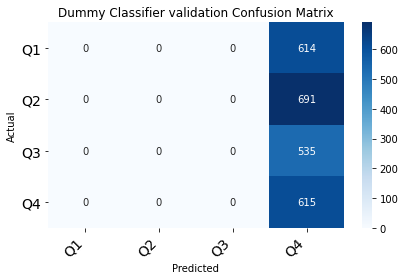

In [139]:
predictions,proba = test_validation_mult(dummy,X_ltr, y_ltr_c, X_lho,False,True)
model_name = 'Dummy Classifier validation'
auc_results[model_name] = roc_auc_score(y_lho_c, proba, multi_class = 'ovr')
f1_results[model_name] = f1_score(y_lho_c, predictions, average = 'weighted')
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {acc_results[model_name]}')
print(f'AUC score: {auc_results[model_name]}')
print(f'F1 score: {f1_results[model_name]}')
print(f'Kappa score: {kappa_results[model_name]}')
matrix = confusion_matrix(y_lho_c, predictions)
names = ['Q1','Q2','Q3','Q4']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()

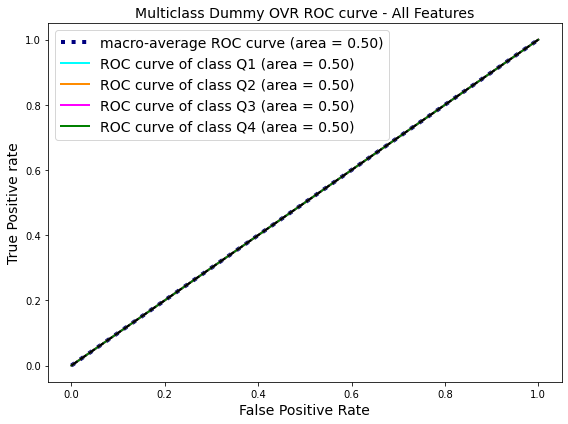

In [140]:
multi_class_auc_plot(dummy,X_ltr, y_ltr_c, X_lho, y_lho_c, title = 'Multiclass Dummy OVR ROC curve - All Features')

## Export Results

In [141]:
class_df = pd.DataFrame.from_dict(classifiers)
class_df['CV_mean_acc']= 0.0
class_df['CV_mean_f1'] = 0.0
class_df['CV_mean_auc'] = 0.0
class_df['CV_mean_kappa'] = 0.0
class_df['CV_sd_acc'] = 0.0
class_df['CV_sd_f1']  = 0.0
class_df['CV_sd_auc'] = 0.0
class_df['CV_sd_kappa'] = 0.0
others= ['LogReg w/Selected Features',    'LogReg w/All Features',
           'RF w/Selected Features',        'RF w/All Features',
          'LGBM w/Selected Features',        'LGBM w/All Features','Dummy Classifier']
for item in others:
    class_df.at[item,'CV_mean_acc'] = round(np.mean(class_df['acc'][item]),4)
    class_df.at[item,'CV_mean_f1']= round(np.mean(class_df['f1'][item]),4)
    class_df.at[item,'CV_mean_auc'] = round(np.mean(class_df['auc'][item]),4)
    class_df.at[item,'CV_mean_kappa'] = round(np.mean(class_df['kappa'][item]),4)
    class_df.at[item,'CV_sd_acc'] = round(np.std(class_df['acc'][item]),4)
    class_df.at[item,'CV_sd_f1'] = round(np.std(class_df['f1'][item]),4)
    class_df.at[item,'CV_sd_auc'] = round(np.std(class_df['auc'][item]),4)
    class_df.at[item,'CV_sd_kappa'] = round(np.std(class_df['kappa'][item]),4)


In [142]:
class_df

,acc,f1,auc,kappa,time,CV_mean_acc,CV_mean_f1,CV_mean_auc,CV_mean_kappa,CV_sd_acc,CV_sd_f1,CV_sd_auc,CV_sd_kappa
LogReg w/Selected Features,"[0.5091649694501018, 0.5570264765784114, 0.540...","[0.4773532322475207, 0.535755169385642, 0.5213...","[0.7908204927132217, 0.8001789239845465, 0.782...","[0.34894699269476614, 0.40599304996433205, 0.3...",3.087521,0.5428,0.5180,0.7884,0.3862,0.0146,0.0172,0.0062,0.0173
LogReg w/All Features,"[0.5203665987780041, 0.5509164969450102, 0.538...","[0.4894590664749659, 0.5318827524830979, 0.522...","[0.7997363492240782, 0.8049245189482296, 0.784...","[0.3630445709878881, 0.39807355516637477, 0.37...",15.043399,0.5456,0.5221,0.7954,0.3898,0.0117,0.0139,0.0078,0.0142
RF w/Selected Features,"[0.5376782077393075, 0.5509164969450102, 0.542...","[0.5149748724220126, 0.533212090888659, 0.5328...","[0.809993955681098, 0.8049187909792921, 0.7986...","[0.3827960710750552, 0.3954898553152285, 0.381...",113.951958,0.5478,0.5305,0.8050,0.3911,0.0121,0.0124,0.0049,0.0150
LGBM w/Selected Features,"[0.575356415478615, 0.6008146639511202, 0.5631...","[0.5651781681887758, 0.5907558248871074, 0.562...","[0.8244683863811658, 0.8256247928994946, 0.811...","[0.43176895206668453, 0.4640021610121111, 0.41...",151.905254,0.5764,0.5676,0.8231,0.4310,0.0135,0.0123,0.0082,0.0182
LGBM w/All Features,"[0.5906313645621182, 0.6089613034623218, 0.567...","[0.5797408545428387, 0.6012474586891289, 0.564...","[0.8356955225223831, 0.8312196377355685, 0.821...","[0.4523464682282041, 0.4748706979386871, 0.417...",334.904132,0.5888,0.5802,0.8324,0.4478,0.0111,0.0110,0.0072,0.0151
Dummy Classifier,"[0.22708757637474541, 0.24439918533604887, 0.2...","[0.22741063592706656, 0.2440707395064646, 0.26...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[-0.028138919274587337, -0.007317332802470711,...",0.271223,0.2515,0.2520,0.5000,0.0022,0.0112,0.0114,0.0000,0.0145
RF w/All Features,"[0.570264765784114, 0.5896130346232179, 0.5692...","[0.546175806079057, 0.5712914155290931, 0.5578...","[0.8326399501834222, 0.8315621282802109, 0.813...","[0.42677557456756143, 0.4479051573085121, 0.41...",123.017438,0.5780,0.5592,0.8271,0.4317,0.0084,0.0077,0.0065,0.0113
LR validation w/Selected Features,0.533198,0.507022,0.787892,0.374498,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
LR validation w/All Features,0.548676,0.526531,0.795468,0.395301,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RF validation w/All Features,0.588595,0.567603,0.830919,0.446976,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [144]:
class_df.to_csv('class_cinc4r.csv')